# Portfolio 4

An airline company conducted a survey on passengers about their satisfaction for the flight. 

## Objectives of the port:
- **Which model predicts customer's satisfaction more accurately?**
    - Logistic regression model
    - Gaussian model
    - MLP model
- **Will the performance of the models improve drastically by hyper parameter tuning?**
- **How might we apply machine learning technique to deep dive into analysis in order to improve customer satisfaction?**
    - Can we find the factors that matter to the satisfaction?
    - Half of **regular customers** are classified as "Not Satisfied" from the result of the survey. Why is that?
    - Neary 75% of **non-regular customers** are classified as "Not Satisfied", why is that?



Below is the information about the passengers as well as the survey fields and how it is measured:
- **Gender:** male or female
- **Customer type:** regular or non-regular airline customer
- **Age:** the actual age of the passenger
- **Type of travel:** the purpose of the passenger's flight (personal or business travel)
- **Class:** business, economy, economy plus
- **Flight distance**
- **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
- **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
- **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
- **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
- **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
- **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
- **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
- **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
- **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
- **Leg room service:** level of satisfaction with leg room service (0: not rated; 1-5)
- **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
- **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
- **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
- **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
- **Departure delay in minutes**
- **Arrival delay in minutes**
- **satisfaction:** 'satisfied' OR 'neutral or dissatisfied'

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Data Loading & Cleaning

In [2]:
# Loading Training Dataset.
df = pd.read_csv('train.csv')
# df.drop('Unnamed: 0', axis=1, inplace = True)

#Checking if some records share the same ID. Nope.
print('Unique Number of id: ',df.id.nunique())
print('Length of dataset: ', len(df))

df.head()

Unique Number of id:  103904
Length of dataset:  103904


Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [3]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace = True)

df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [5]:
average_arrival_delay_min = df['Arrival Delay in Minutes'].mean()

print(average_arrival_delay_min)

15.178678301832152


### Findings:

1. There are some missing values under **'Arrival Delay in Minutes'** column.

    The missing values could be filled with the average value attained from the column (15.178678301832152)

2. There are some **categorical varibales:**

    - Gender = [Male, Female]
    - Customer Type = [Loyal Customer, disloyal Customer]
    - Type of Travel = [Business travel, Personal Travel]
    - Class = [Business, Eco Plus, Eco]
    - satisfaction = [satisfied, neutral or dissatisfied]

In order to perform machine learning, we are going to transform the value to either boolean value or ordinal value. However, we are at the stage of EDA, so this will be done beforfe moving to model building. We will just fill the missing value.

For example, Gender can be transormed into [1,0] and the column name can also be updated to 'Male', moreover the Class can also be transformed in ordinal mannar i.e. highest class receives higher number (ordered)

In [6]:
# Filling missing values.
df['Arrival Delay in Minutes'].fillna(average_arrival_delay_min, inplace = True)

#Checking if there still are missing values.
df.isnull().any()

Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Delay in Minutes             False
satisfaction                         False
dtype: bool

In [7]:
df_eda = df.copy()
df_eda.head(5)

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [8]:
# Transforming the dataset.
df['Gender'].replace({'Male':1, 'Female':0}, inplace = True)
df['Customer Type'].replace({'Loyal Customer':1, 'disloyal Customer':0}, inplace = True)
df['Type of Travel'].replace({'Business travel':1, 'Personal Travel':0}, inplace = True)
df['Class'].replace({'Business':2, 'Eco Plus':1, 'Eco':0}, inplace = True)
df['satisfaction'].replace({'satisfied':1, 'neutral or dissatisfied':0}, inplace = True)

df = df.rename(columns={
                    'Gender': 'Male',
                    'Customer Type': 'Loyal',
                    'Type of Travel': 'Business Trip',
                    'Class': 'Level of Class',
                    'satisfaction': 'Satisfied'}
              )

df.head()
# We will use df as the transformed dataset, df_eda as dataset for EDA in order to ommit the complexity of labeling x,y axis.


Male  Loyal  Age  Business Trip  Level of Class  Flight Distance  \
0     1      1   13              0               1              460   
1     1      0   25              1               2              235   
2     0      1   26              1               2             1142   
3     0      1   25              1               2              562   
4     1      1   61              1               2              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  Satisfied  
0                      18.0          0  
1                       6.0          0  
2                       0.0          1  
3                       9.0          0  
4                       0.0          1  

[5 rows x 23 columns]

In [9]:
# Assuming some variables that can take values between 0-5 are from the survey. 
survey = ['Inflight wifi service',
          'Departure/Arrival time convenient',
          'Ease of Online booking',
          'Gate location',
          'Food and drink',
          'Online boarding',
          'Seat comfort',
          'Inflight entertainment',
          'On-board service',
          'Leg room service',
          'Baggage handling',
          'Checkin service',
          'Inflight service',
          'Cleanliness']

target = 'Satisfied'

# df['Average Score'] = df[scores].mean(axis=1)
# df['Total Score'] = df[scores].sum(axis=1)

## Exploratory Data Analysis

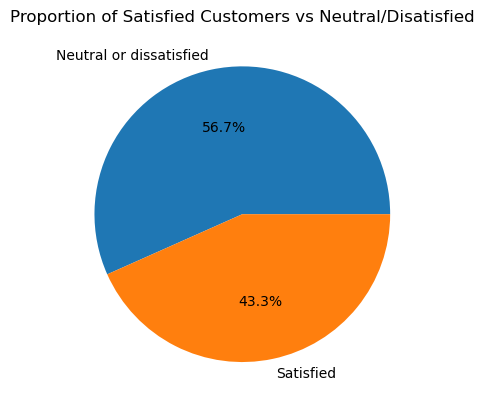

In [10]:
plt.pie(df_eda.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')
plt.title("Proportion of Satisfied Customers vs Neutral/Disatisfied")
pass

/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


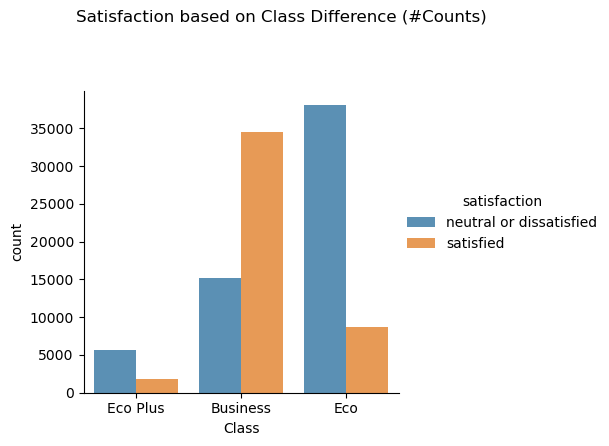

In [11]:
sns.catplot(
    data=df_eda, kind="count",
    x="Class", hue="satisfaction", alpha=.8, height=4.5)

plt.subplots_adjust(top=0.8)
plt.suptitle("Satisfaction based on Class Difference (#Counts)")
pass

There seems to be a **huge difference in the satisfied ration among different classes**.

/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


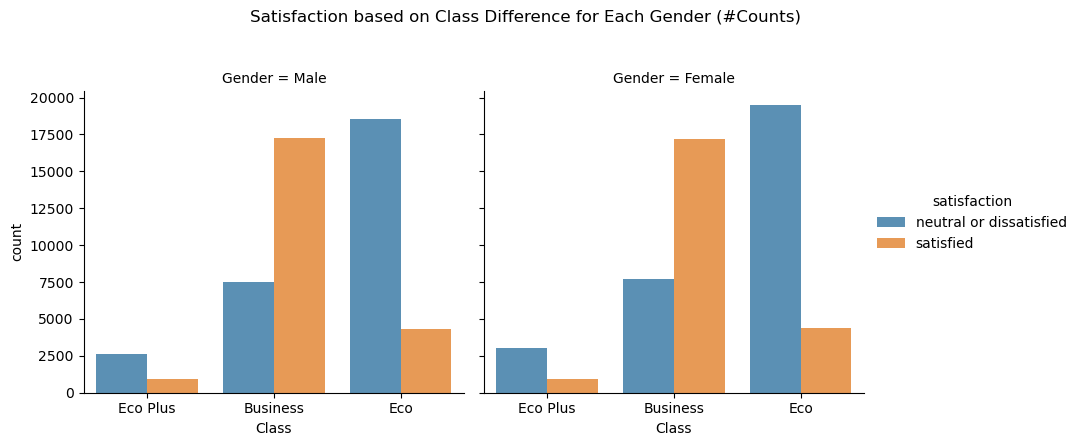

In [12]:
sns.catplot(
    data=df_eda, kind="count",
    x="Class", hue="satisfaction", alpha=.8, height=4.5, col="Gender"
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Satisfaction based on Class Difference for Each Gender (#Counts)")
pass

There is a **significant difference in satisfied/disatisfied ratio between Eco Plus, Eco classes and Business Class.**

One more good finding is that there is **not much difference between genders.** Their distribution seems close.

/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


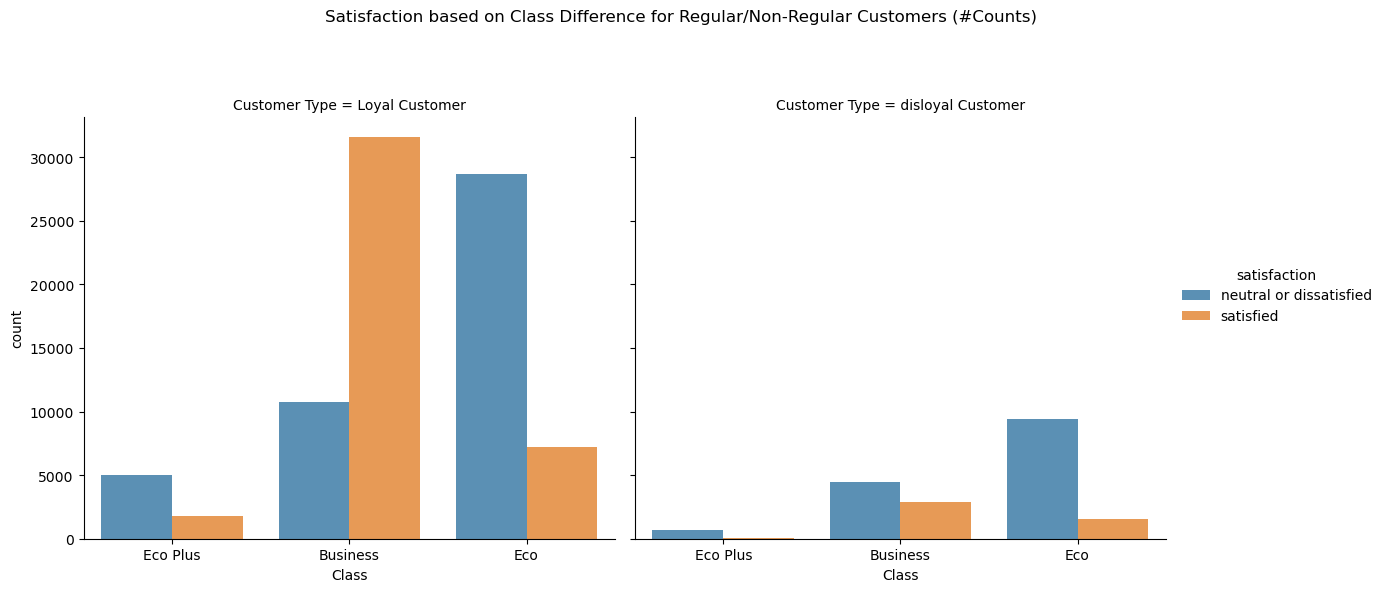

In [13]:
sns.catplot(
    data=df_eda, kind="count",
    x="Class", hue="satisfaction", alpha=.8, height=6, col="Customer Type"
)

plt.subplots_adjust(top=0.8)
plt.suptitle("Satisfaction based on Class Difference for Regular/Non-Regular Customers (#Counts)")

pass

**Huge difference when the customer is regular or not especially at Business Class.** result is nearly opposite.

We can dive in later to see why so different **(experience in Business Class for regular vs non-regular customers)**.

Is it just because regular customers tend to leave a better score?

/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


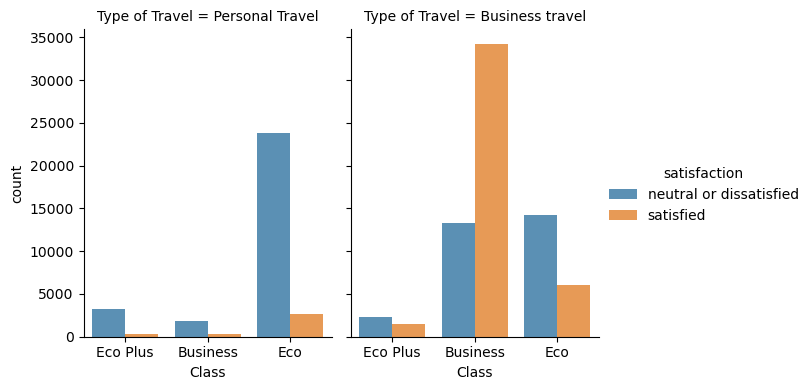

In [14]:
sns.catplot(x="Class", hue="satisfaction", col="Type of Travel", data=df_eda, kind="count", height=4, aspect=.8, alpha=.8)

**Almost all Customers on personal travel are classified as 'neutral or dissatisfied'**. Of those boarded on Eco class are mostly not satisfied with the flight.

On the other hand, **cutomers on Business travel and boarded on Business class are satisfied**.

/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118:

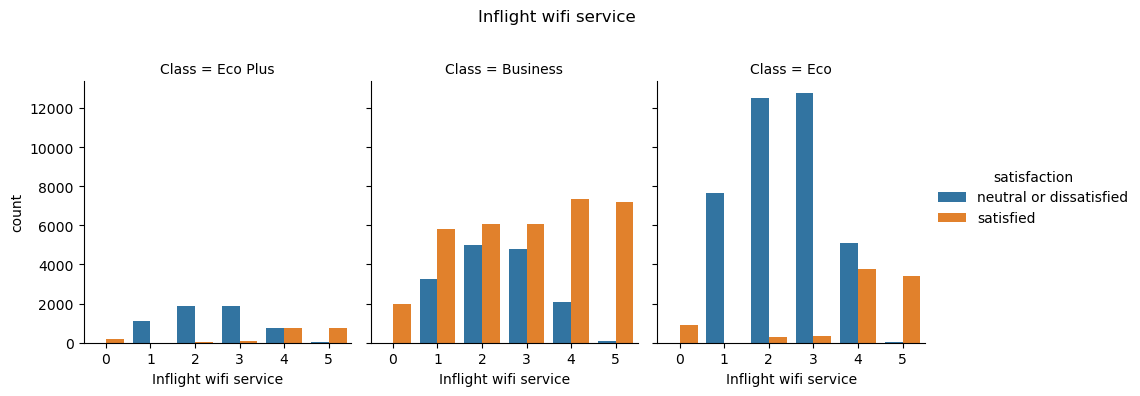

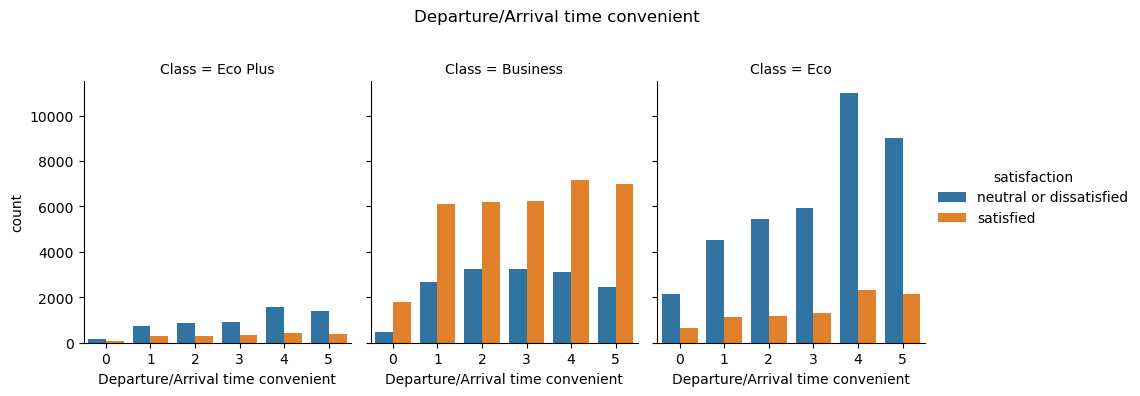

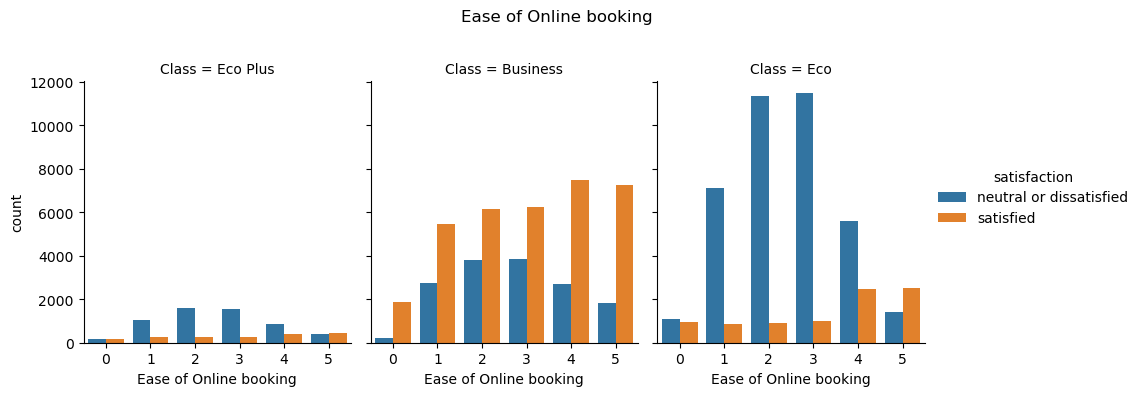

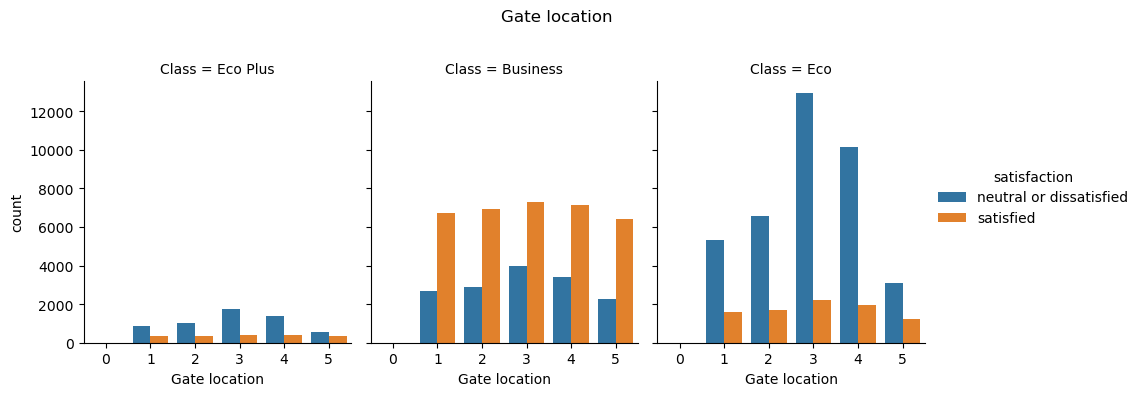

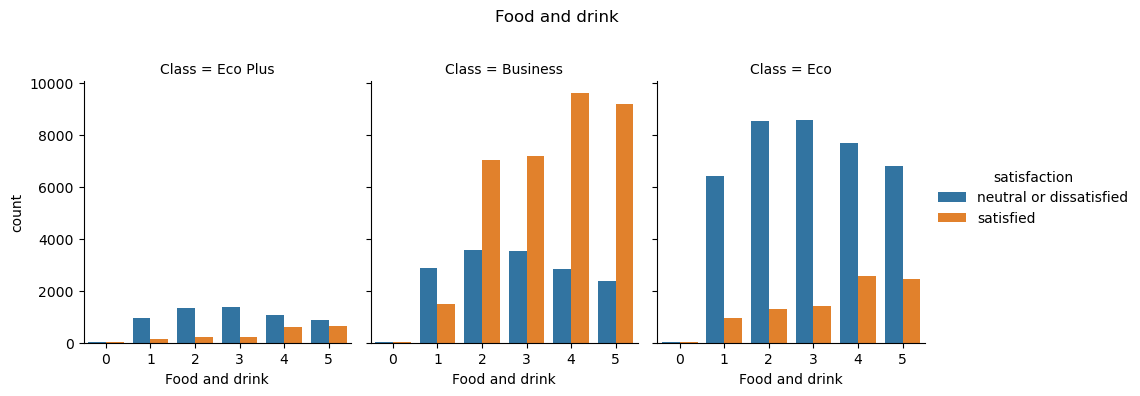

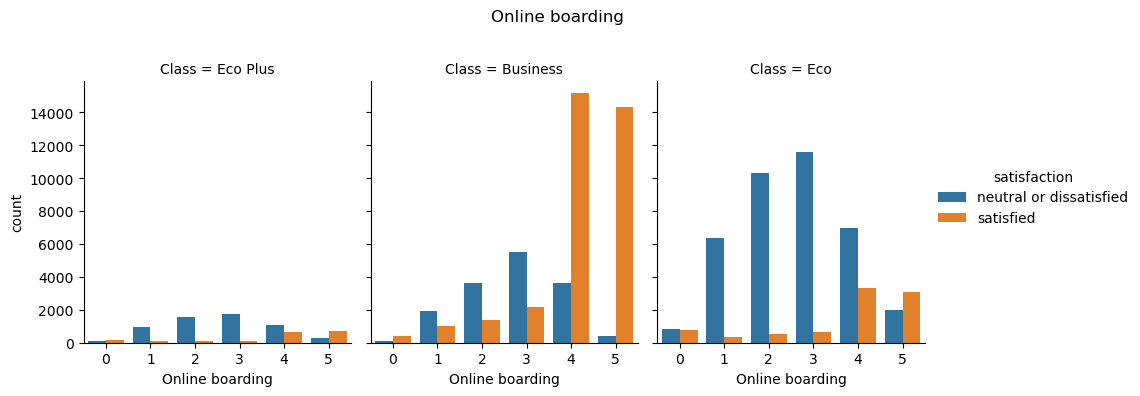

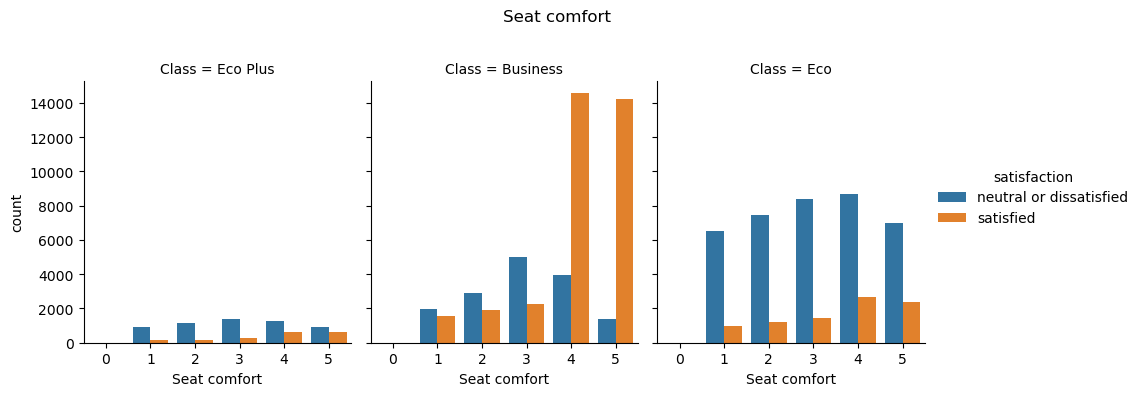

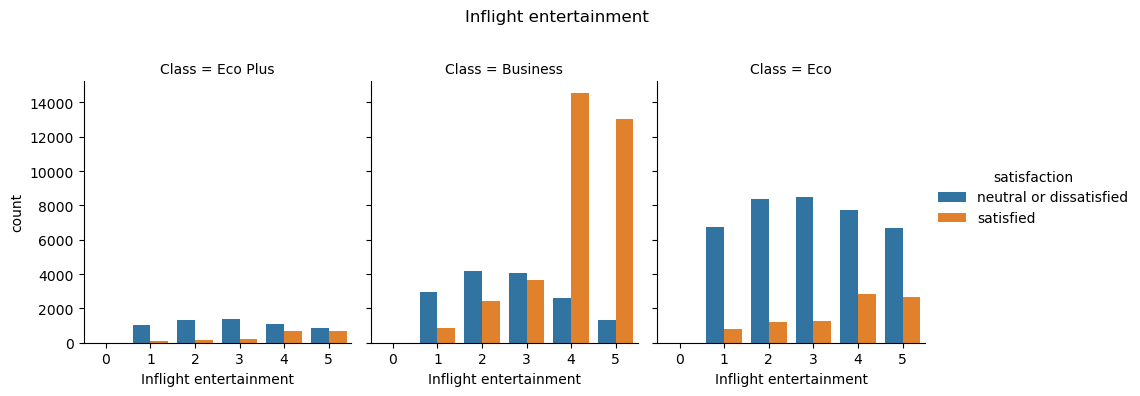

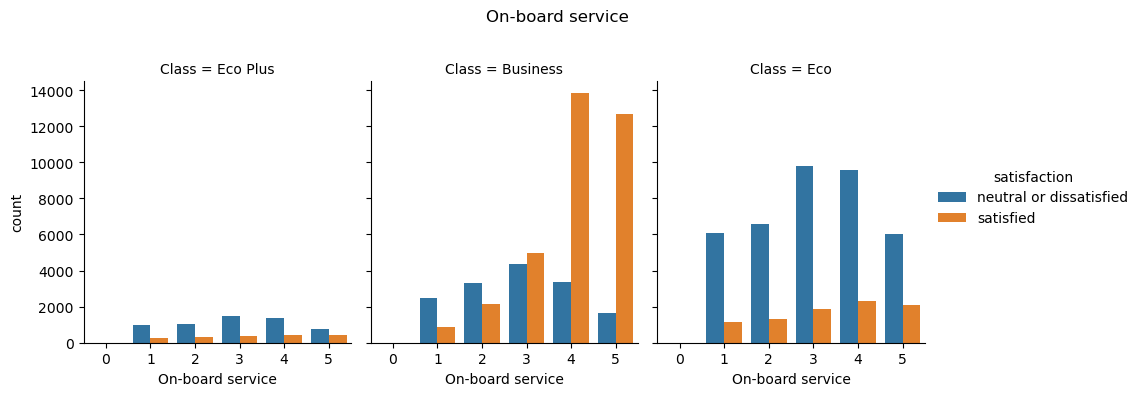

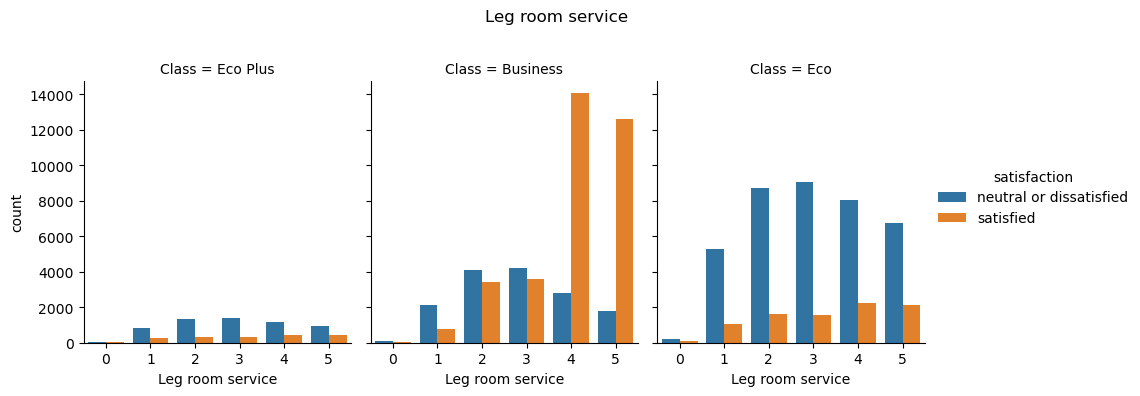

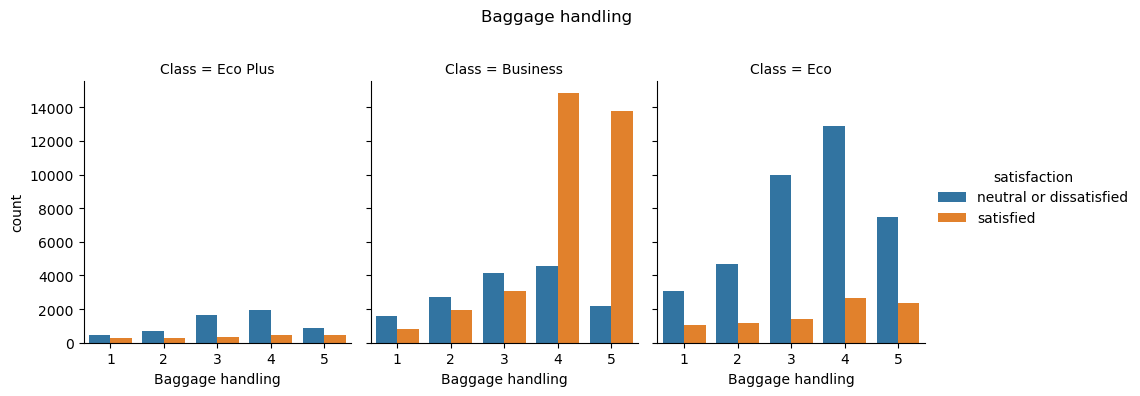

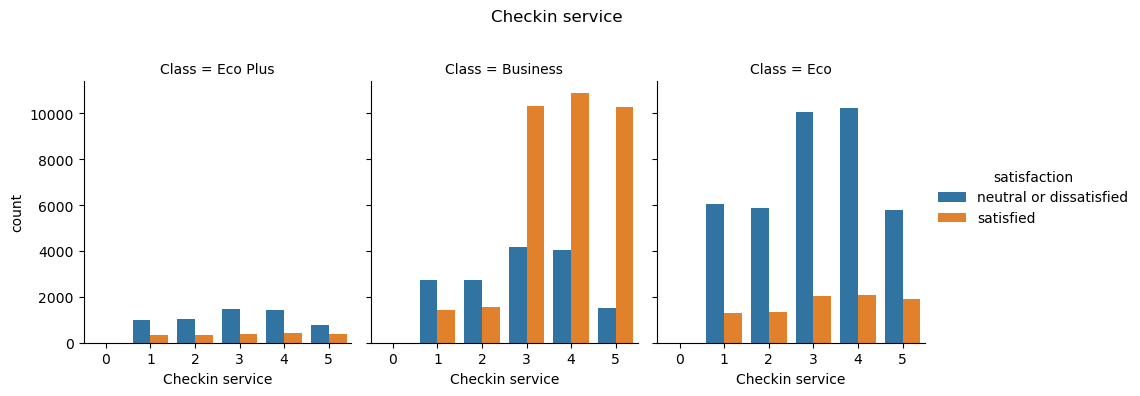

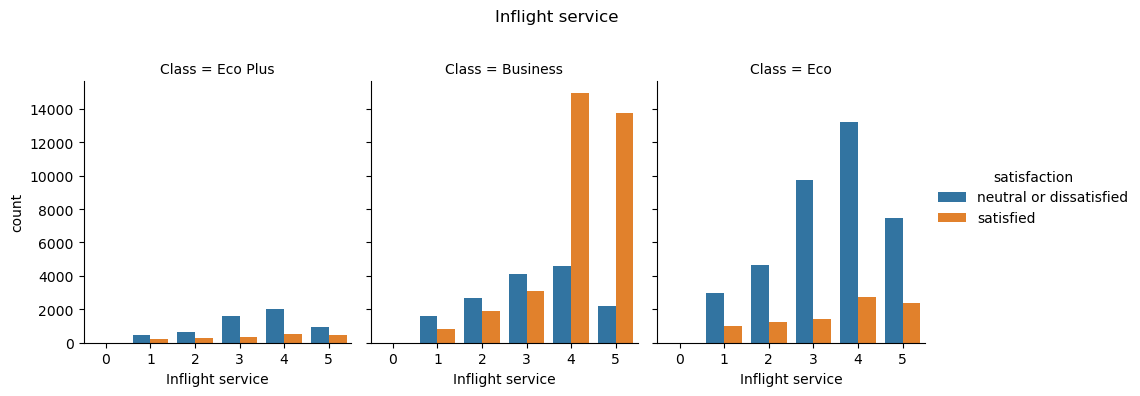

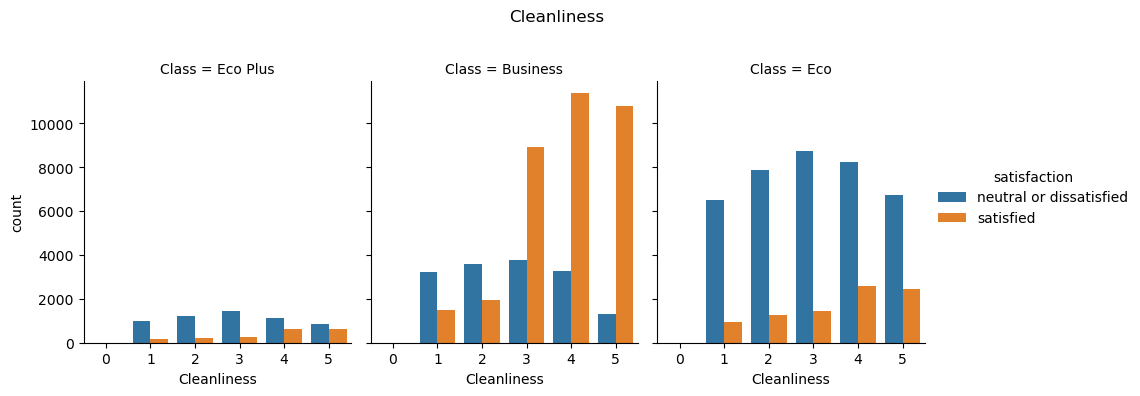

In [15]:
#Outputting the survey results (0-5) based on the class difference.

for i in survey:
    title = str(i)
    sns.catplot(x=i,
                hue="satisfaction",
                col="Class", data=df_eda,
                kind="count", height=4,
                aspect=.8)
    plt.subplots_adjust(top=0.8)
    plt.suptitle(title)

### Findings (Business Class):
- 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness' are highly rated by satisfied customers.
- Survey distribution of 'Departure/Arrival time convenient', 'Gate location' seem to be similar for satisfied and disatisfied customers. (this may not have much impact on the model, and we will check later)

### Findings (Eco Class):
- Customers who had access to in-flight wifi seem satisfied.
- good 'online-boarding' experience may have impact on satisfaction.

<!-- ['Inflight wifi service',
          'Departure/Arrival time convenient',
          'Ease of Online booking',
          'Gate location',
          'Food and drink',
          'Online boarding',
          'Seat comfort',
          'Inflight entertainment',
          'On-board service',
          'Leg room service',
          'Baggage handling',
          'Checkin service',
          'Inflight service',
          'Cleanliness'] -->

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

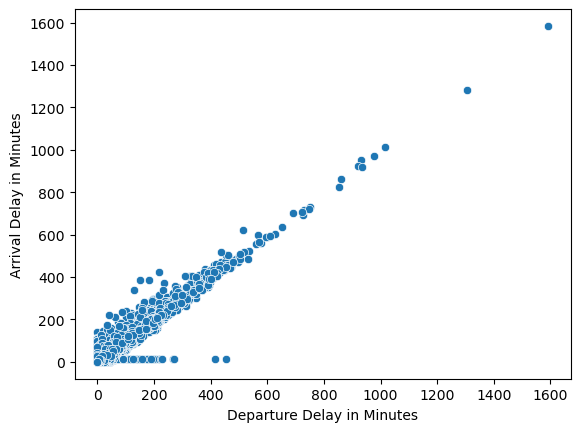

In [16]:
# Checking relationship vetween Departure Delay and Arrival Delay
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data=df_eda)

In [17]:
corr = df.corr()
corr

Male     Loyal       Age  \
Male                               1.000000  0.031732  0.008928   
Loyal                              0.031732  1.000000  0.281674   
Age                                0.008928  0.281674  1.000000   
Business Trip                     -0.006909 -0.308333  0.048524   
Level of Class                     0.008253  0.105735  0.140565   
Flight Distance                    0.005828  0.225200  0.099461   
Inflight wifi service              0.008974  0.007543  0.017859   
Departure/Arrival time convenient  0.009142  0.206869  0.038125   
Ease of Online booking             0.006951  0.019509  0.024842   
Gate location                      0.000333 -0.006078 -0.001330   
Food and drink                     0.005772  0.059454  0.023000   
Online boarding                   -0.042260  0.189262  0.208939   
Seat comfort                      -0.026502  0.159484  0.160277   
Inflight entertainment             0.006117  0.109930  0.076444   
On-board service                   0.008156  0.056560  0.057594   
Leg room service                   0.031798  0.047868  0.040583   
Baggage handling                   0.037391 -0.024723 -0.047529   
Checkin service                    0.010563  0.032177  0.035482   
Inflight service                   0.039410 -0.022670 -0.049427   
Cleanliness                        0.006505  0.083613  0.053611   
Departure Delay in Minutes         0.002935 -0.004036 -0.010152   
Arrival Delay in Minutes           0.000395 -0.004741 -0.012127   
Satisfied                          0.012211  0.187638  0.137167   

                                   Business Trip  Level of Class  \
Male                                   -0.006909        0.008253   
Loyal                                  -0.308333        0.105735   
Age                                     0.048524        0.140565   
Business Trip                           1.000000        0.545257   
Level of Class                          0.545257        1.000000   
Flight Distance                         0.267344        0.451211   
Inflight wifi service                   0.105085        0.036279   
Departure/Arrival time convenient      -0.259763       -0.092788   
Ease of Online booking                  0.133511        0.106391   
Gate location                           0.030700        0.004150   
Food and drink                          0.063439        0.085908   
Online boarding                         0.224803        0.322924   
Seat comfort                            0.124399        0.227444   
Inflight entertainment                  0.148199        0.194366   
On-board service                        0.056543        0.209505   
Leg room service                        0.138803        0.204964   
Baggage handling                        0.031321        0.160460   
Checkin service                        -0.016751        0.151613   
Inflight service                        0.022599        0.156353   
Cleanliness                             0.079207        0.135818   
Departure Delay in Minutes              0.005432       -0.009637   
Arrival Delay in Minutes                0.005674       -0.013654   
Satisfied                               0.449000        0.494471   

                                   Flight Distance  Inflight wifi service  \
Male                                      0.005828               0.008974   
Loyal                                     0.225200               0.007543   
Age                                       0.099461               0.017859   
Business Trip                             0.267344               0.105085   
Level of Class                            0.451211               0.036279   
Flight Distance                           1.000000               0.007131   
Inflight wifi service                     0.007131               1.000000   
Departure/Arrival time convenient        -0.020043               0.343845   
Ease of Online booking                    0.065717               0.715856   
Gate location              

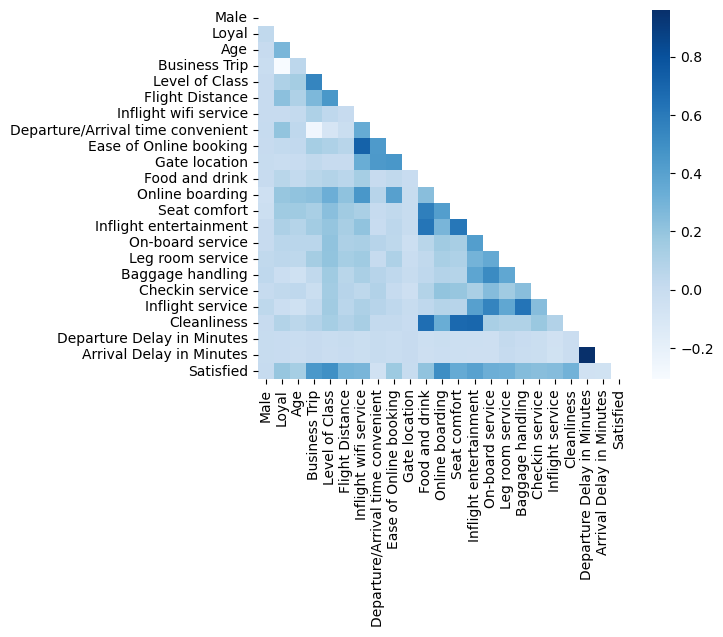

In [18]:
matrix = np.triu(corr)
sns.heatmap(corr, square = True, cmap = 'Blues', mask=matrix)
pass

Firstly, scatterplot exhibits strong linear pattern. We then checked the correlation, and the number 0.965481 was returned.

Those 2 x variables are highly correlated, and it makes logical sense. That is, if a flight departure is delayed then there will be a delay on arrival by about the same time.

## Feature Exploration

In [19]:
X = df.drop(['Satisfied', 'Arrival Delay in Minutes'], axis=1)

# Scaling the whole dataset in order to remove bias stemmed from measuring-scale difference.
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X_scaled_for_fs = df_scaled.drop('Satisfied', axis=1)
y_scaled_for_fs = df_scaled['Satisfied']

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=22)
fit = bestfeatures.fit(X_scaled_for_fs, y_scaled_for_fs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print('F Classif:')
print(featureScores.nlargest(22,'Score'))  #print 10 best features

F Classif:
                                Specs         Score
11                    Online boarding  35296.580825
4                      Level of Class  33625.834651
3                       Business Trip  26236.004395
13             Inflight entertainment  19563.225882
12                       Seat comfort  14453.775842
14                   On-board service  12051.058171
15                   Leg room service  11295.187825
19                        Cleanliness  10672.099150
5                     Flight Distance  10184.421915
6               Inflight wifi service   9132.663528
16                   Baggage handling   6794.524803
18                   Inflight service   6620.053164
17                    Checkin service   6137.804252
10                     Food and drink   4790.425741
1                               Loyal   3791.688358
8              Ease of Online booking   3156.358728
2                                 Age   1992.389117
21                                NaN    344.627230
7

### Findings:

**Seems below features have great impact on the satisfaction:**
- Online boarding
- Level of Class
- Business Trip
- Inflight entertainment

**And the below features also seem to have impact:**
- Seat comfort
- On-board service
- Leg room service
- Cleanliness
- Flight Distance
- Inflight wifi service
- Baggage handling
- Inflight service
- Checkin service
- Food and drink
- Loyal
- Ease of Online booking

In this portfolio, we will keep most of the variables, we only drop the 'Arrival Delay in Minutes'.

## Customer Satisfaction Predicting Models

Now we manually explored the dataset, we are going to tackle the first objective: 'predict customers' satisfaction'.
Building 3 x models and tune each of them to finally compare their accuracy scores to assess performance.

3 x models are based on:
- Logistic Regression
- Gaussian Naive Bayes
- Neural Network

Assessment is based on accuracy score, and 10 x scores are collected from each model with k-fold cross-validation technique.
Later on, we will carry out ANOVA and Tukey Karmer test to compare them.

### Logistic Regression (Untuned)

In [20]:
# Defining target and features. 
y = df.Satisfied
X = df.drop(['Satisfied', 'Arrival Delay in Minutes'], axis=1)

scaler = StandardScaler()

log_model = LogisticRegression()

# Preparation to scale each fold after the KFold Split, then apply log_model
pipeline = make_pipeline(scaler, log_model)

# 10 x samples with K-Fold Cross Validation.
scores_log_model = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

In [21]:
print(scores_log_model, '\n')

print(scores_log_model.mean())

[0.87075354 0.86911751 0.8758541  0.87787508 0.87487969 0.87564966
 0.87247353 0.87372474 0.87911453 0.87410972] 

0.8743552107773729


In [22]:
# We will keep using these datasets for all models just for hyperparameter tuning purpose.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state = 63)

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [23]:
# Fitting the model
log_model.fit(X_train, y_train)

# Store the prediction in pred
pred_test = log_model.predict(X_test)
pred_train = log_model.predict(X_train)

# Calculate the accuracy score
print('Accuracy Score on Test Data: ', round(accuracy_score(y_test, pred_test), 4))
print('Accuracy Score on Training Data: ', round(accuracy_score(y_train, pred_train), 4))

Accuracy Score on Test Data:  0.8709
Accuracy Score on Training Data:  0.8756


In [24]:
#Confusion matrix
cm = confusion_matrix(y_test, pred_test)
cm

array([[10598,  1178],
       [ 1504,  7501]])

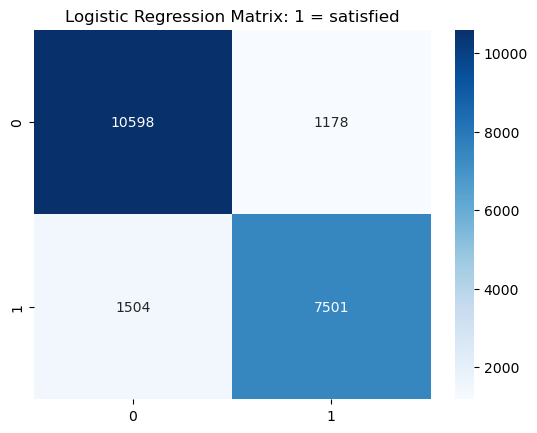

In [25]:
# Visualising the confusion matrix for ease of readiness.
def ShowCM(cm, title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
    plt.title(title)
    pass

ShowCM(cm, "Logistic Regression Matrix: 1 = satisfied")

### Logistic Regression (Tuning)

In [26]:
params = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]

In [27]:
import warnings
warnings.filterwarnings("ignore")

gs = GridSearchCV(log_model, param_grid = params, cv = 5, n_jobs=-1)
best = gs.fit(X,y)

best.best_estimator_

/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LogisticRegression(solver='newton-cg')

**Hyperparameter:** solver='newton-cg'

In [28]:
log_model_tuned = LogisticRegression(solver='newton-cg')
pipeline = make_pipeline(scaler, log_model_tuned)

scores_log_model_tuned = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

In [29]:
scores_log_model_tuned.mean()

0.8745092105600751

### Gaussian Naive Bayes (Untuned)

In [30]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
pipeline = make_pipeline(scaler, gnb_model)

scores_gnb_model = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
scores_gnb_model

array([0.86507555, 0.87084977, 0.86411317, 0.86738524, 0.87179981,
       0.86179018, 0.86708373, 0.86294514, 0.86891242, 0.86823869])

In [31]:
# Fitting the model
gnb_model.fit(X_train, y_train)

# Store the prediction in pred
pred_test = gnb_model.predict(X_test)
pred_train = gnb_model.predict(X_train)

# Calculate the accuracy score
print('Accuracy Score on Test Data: ', round(accuracy_score(y_test, pred_test), 4))
print('Accuracy Score on Training Data: ', round(accuracy_score(y_train, pred_train), 4))

Accuracy Score on Test Data:  0.863
Accuracy Score on Training Data:  0.8676


In [32]:
cm_gnb = confusion_matrix(y_test, pred_test)
cm_gnb

array([[10593,  1183],
       [ 1664,  7341]])

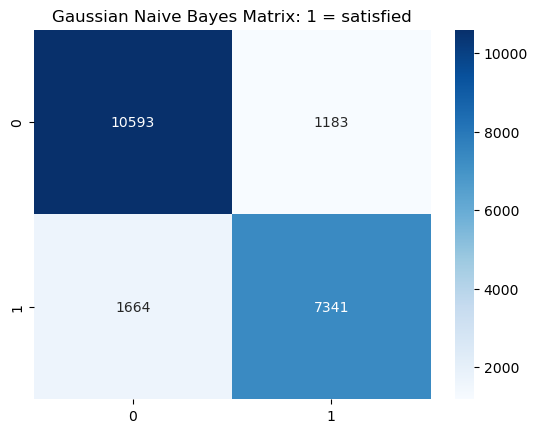

In [33]:
ShowCM(cm_gnb, 'Gaussian Naive Bayes Matrix: 1 = satisfied')

In [34]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

In [35]:
gs = GridSearchCV(gnb_model, param_grid = params, cv = 5, n_jobs=-1)
best = gs.fit(X,y)

best.best_estimator_

GaussianNB(var_smoothing=1.519911082952933e-09)

**Hyperparameter:** var_smoothing = 1.519911082952933e-09

In [36]:
gnb_model_tuned = GaussianNB(var_smoothing=1.519911082952933e-09)
pipeline = make_pipeline(scaler, gnb_model_tuned)

scores_gnb_model_tuned = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))

In [37]:
scores_gnb_model_tuned.mean()

0.8668674981468101

### Neural Network Model (Untuned)

In [38]:
mlp_model = MLPClassifier(max_iter=100)
pipeline = make_pipeline(scaler, mlp_model)

scores_mlp_model = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
scores_mlp_model

array([0.96121644, 0.95755943, 0.95890675, 0.95736695, 0.95659288,
       0.95563041, 0.95928778, 0.95409047, 0.95813282, 0.96198268])

In [39]:
# Fitting the model with train dataset
mlp_model.fit(X_train, y_train)

# Store the prediction in pred
pred_test = mlp_model.predict(X_test)
pred_train = mlp_model.predict(X_train)

# Calculate the accuracy score
print('Accuracy Score on Test Data: ', round(accuracy_score(y_test, pred_test), 4))
print('Accuracy Score on Training Data: ', round(accuracy_score(y_train, pred_train), 4))

Accuracy Score on Test Data:  0.9519
Accuracy Score on Training Data:  0.9669


In [40]:
cm_mlp = confusion_matrix(y_test, pred_test)
cm_mlp

array([[11360,   416],
       [  583,  8422]])

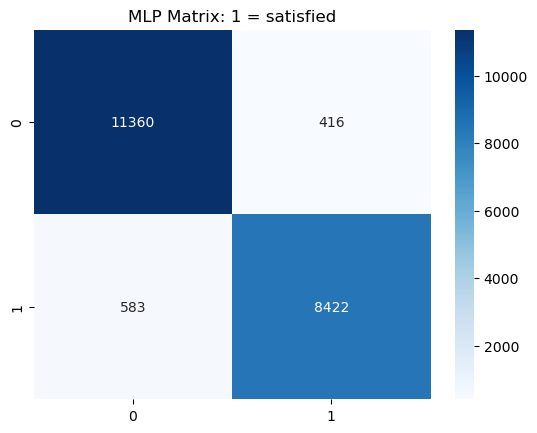

In [41]:
ShowCM(cm_mlp, 'MLP Matrix: 1 = satisfied')

In [42]:
params = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [43]:
# from sklearn.model_selection import GridSearchCV

# clf = GridSearchCV(mlp_model, params, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train)

NameError: name 'mlp' is not defined

In [ ]:
# print(clf.best_params_)

**Best parameters found:**

 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}

In [44]:
mlp_model_tuned = MLPClassifier(max_iter=100, 
                         activation = 'tanh',
                          alpha = 0.05,
                          hidden_layer_sizes = (50, 50, 50),
                          learning_rate = 'constant',
                          solver = 'adam')

In [45]:
pipeline = make_pipeline(scaler, mlp_model_tuned)

scores_mlp_model_tuned = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
scores_mlp_model_tuned

array([0.96169762, 0.95919546, 0.9618901 , 0.96054278, 0.96650626,
       0.96188643, 0.96169394, 0.95755534, 0.95851781, 0.95967276])

In [46]:
scores_mlp_model.mean()

0.9580766597732231

In [47]:
scores_mlp_model_tuned.mean()

0.9609158486433576

### Model Comparison

Now all models' tuning is completed, we are going to compare their accuracy scores.

In [48]:
model_performance = pd.DataFrame({'Logistic Regression': scores_log_model,
                        'Logistic Regression (Tuned)': scores_log_model_tuned,
                        'Gaussian Model': scores_gnb_model,
                        'Gaussian Model (Tuned)': scores_gnb_model_tuned,
                        'MLP Model': scores_mlp_model,
                        'MLP Model (Tuned)': scores_mlp_model_tuned,
                       })
model_performance

Logistic Regression  Logistic Regression (Tuned)  Gaussian Model  \
0             0.870754                     0.871235        0.865076   
1             0.869118                     0.878453        0.870850   
2             0.875854                     0.871716        0.864113   
3             0.877875                     0.871620        0.867385   
4             0.874880                     0.877960        0.871800   
5             0.875650                     0.875553        0.861790   
6             0.872474                     0.874302        0.867084   
7             0.873725                     0.876227        0.862945   
8             0.879115                     0.871511        0.868912   
9             0.874110                     0.876516        0.868239   

   Gaussian Model (Tuned)  MLP Model  MLP Model (Tuned)  
0                0.864017   0.961216           0.961698  
1                0.869791   0.957559           0.959195  
2                0.862862   0.958907           0.961890  
3                0.870272   0.957367           0.960543  
4                0.869875   0.956593           0.966506  
5                0.864100   0.955630           0.961886  
6                0.860828   0.959288           0.961694  
7                0.871896   0.954090           0.957555  
8                0.866025   0.958133           0.958518  
9                0.869009   0.961983           0.959673

In [49]:
model_performance.describe().T

count      mean       std       min       25%  \
Logistic Regression           10.0  0.874355  0.003049  0.869118  0.872786   
Logistic Regression (Tuned)   10.0  0.874509  0.002817  0.871235  0.871644   
Gaussian Model                10.0  0.866819  0.003308  0.861790  0.864354   
Gaussian Model (Tuned)        10.0  0.866867  0.003772  0.860828  0.864038   
MLP Model                     10.0  0.958077  0.002406  0.954090  0.956786   
MLP Model (Tuned)             10.0  0.960916  0.002496  0.957555  0.959315   

                                  50%       75%       max  
Logistic Regression          0.874495  0.875803  0.879115  
Logistic Regression (Tuned)  0.874928  0.876444  0.878453  
Gaussian Model               0.867234  0.868744  0.871800  
Gaussian Model (Tuned)       0.867517  0.869854  0.871896  
MLP Model                    0.957846  0.959193  0.961983  
MLP Model (Tuned)            0.961118  0.961839  0.966506

**Findings:**
- Overall, all models show slight improvement in their average accuracy score after hyperparameter tuning.
- Accuracy score standard deviation has become smaller, meaning that the prediction is more accurate in general except for Logistic Regression Model.
- MLP based models have the higher accuracy score than other models.
    

We can see which model has significantly different average performance by conducting **ANOVA**.


In [50]:
Tukey_df = model_performance.stack().reset_index()

Tukey_df.drop('level_0', axis=1, inplace =True)
Tukey_df.rename(columns={0:'score', 'level_1':'model'}, inplace = True)
Tukey_df.head()

model     score
0          Logistic Regression  0.870754
1  Logistic Regression (Tuned)  0.871235
2               Gaussian Model  0.865076
3       Gaussian Model (Tuned)  0.864017
4                    MLP Model  0.961216

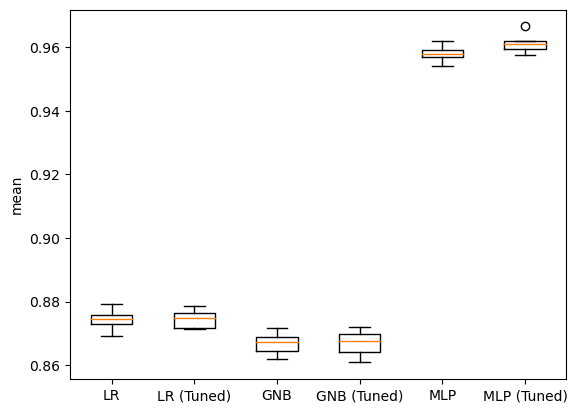

In [51]:
models = [scores_log_model, scores_log_model_tuned, scores_gnb_model, scores_gnb_model_tuned, scores_mlp_model, scores_mlp_model_tuned]

fig, ax = plt.subplots(1, 1)
ax.boxplot(models)
ax.set_xticklabels(['LR', 'LR (Tuned)', 'GNB',
       'GNB (Tuned)', 'MLP', 'MLP (Tuned)'])
ax.set_ylabel("mean")

plt.show()

**NOTE:**

The boxplot shows each models' average accuracy score as well as its deviation.

From this we can see that the MLP based models clearly have highest performance. Also, to note that even though the assumptions to conduct ANOVA are not met, we will continue checking the difference between models with ANOVA, then move to Tukey Karmer Test to see who is different.


In [52]:
f_oneway(scores_log_model, scores_log_model_tuned, scores_gnb_model, scores_gnb_model_tuned, scores_mlp_model, scores_mlp_model_tuned)


F_onewayResult(statistic=2334.8773074226106, pvalue=9.018794212099722e-62)

**pvalue=2.5198413256041824e-44 < 0.05**

ANOVA suggests that **there is at least one model with different average accuracy score from others**.

We are moving to conduct Tukey Karmer's method to see differences between all models.



In [53]:
# perform Tukey's test with 6 x models
tukey = pairwise_tukeyhsd(endog=Tukey_df['score'],
                          groups=Tukey_df['model'],
                          alpha=0.05)

#display results
print(tukey)

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
           group1                      group2           meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------------
             Gaussian Model      Gaussian Model (Tuned)      0.0    1.0 -0.0039  0.004  False
             Gaussian Model         Logistic Regression   0.0075    0.0  0.0036 0.0115   True
             Gaussian Model Logistic Regression (Tuned)   0.0077    0.0  0.0037 0.0117   True
             Gaussian Model                   MLP Model   0.0913    0.0  0.0873 0.0952   True
             Gaussian Model           MLP Model (Tuned)   0.0941    0.0  0.0901 0.0981   True
     Gaussian Model (Tuned)         Logistic Regression   0.0075    0.0  0.0035 0.0115   True
     Gaussian Model (Tuned) Logistic Regression (Tuned)   0.0076    0.0  0.0037 0.0116   True
     Gaussian Model (Tuned)                   MLP Model   0.

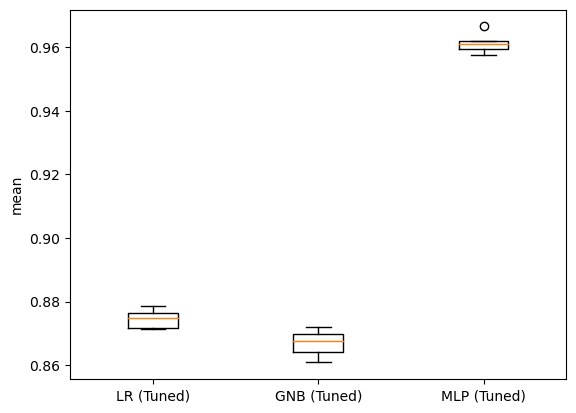

In [54]:
models = [scores_log_model_tuned, scores_gnb_model_tuned, scores_mlp_model_tuned]

fig, ax = plt.subplots(1, 1)
ax.boxplot(models)
ax.set_xticklabels(['LR (Tuned)', 'GNB (Tuned)', 'MLP (Tuned)'])
ax.set_ylabel("mean")

plt.show()

In [55]:
model_performance_1 = model_performance.drop({'Logistic Regression', 'Gaussian Model', 'MLP Model'}, axis=1)

Tukey_df1 = model_performance_1.stack().reset_index()
Tukey_df1.drop('level_0', axis=1, inplace =True)
Tukey_df1.rename(columns={0:'score', 'level_1':'model'}, inplace = True)


# perform Tukey's test with 3 x models
tukey = pairwise_tukeyhsd(endog=Tukey_df1['score'],
                          groups=Tukey_df1['model'],
                          alpha=0.05)

#display results
print(tukey)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
           group1                      group2           meandiff p-adj lower  upper  reject
-------------------------------------------------------------------------------------------
     Gaussian Model (Tuned) Logistic Regression (Tuned)   0.0076   0.0 0.0042 0.0111   True
     Gaussian Model (Tuned)           MLP Model (Tuned)    0.094   0.0 0.0906 0.0975   True
Logistic Regression (Tuned)           MLP Model (Tuned)   0.0864   0.0  0.083 0.0898   True
-------------------------------------------------------------------------------------------


**From the table, we can see that:**
- All models have no signifficant improvement even after tuning.
- There is a statistically signifficant difference in between models with their accuracy score (performance.)
- MLP model has the highest performance of those and it's clear from the average accuracy score.

To note, the above wording is not 100% correct. We should interpret the result as ***"We do not have statistically significant evidence to say they do not have the same average score."***

#### Which Model Predicts Customer's Satisfaction More Accurately?
MLP Model returns the most accurate prediction (Nearly 96% accuracy)

#### Will the Model Performance Drastically Improve wih Hyperparameter Tuning?
The improvement was so small, and the time taken to search for the best combination of parameters was so long that in my opinion it was not worth it. However, in some fields this small improvements can leave a good impact and I do not conclude that it was a worthless effort this time. In here, some may argue it was too much effort for the small accuracy improvement on customer satisfaction prediction.

## How a Machine Sees the Data

In this section, we want to explore how machine learning technique helps us see the patterns in data. We may encounter more interesting findings.

We want to see below:
- Can we find the factors that matter to the satisfaction?
- Half of **regular customers** are classified as "Not Satisfied" from the result of the survey. Why is that?
- Neary 75% of **non-regular customers** are classified as "Not Satisfied", why is that?


**We first need to devide the dataset with some traits.**
- **Regular Customer data**
- **Non regular customer data**
- **Loyal Customer (Eco) Satisfaction difference!!!!**
- **Loyal Customer (Business Class) Satisfaction difference!!!!**

In [56]:
regulars = df.loc[df.Loyal == 1]
non_regulars = df.loc[df.Loyal == 0]

regulars_eco = regulars.loc[regulars['Level of Class'] == 0]
regulars_bus = regulars.loc[regulars['Level of Class'] == 2]


X_regulars = regulars.drop({'Satisfied','Arrival Delay in Minutes'} , axis=1)
X_non_regulars = non_regulars.drop({'Satisfied','Arrival Delay in Minutes'} , axis=1)
X_regulars_eco = regulars_eco.drop({'Satisfied','Arrival Delay in Minutes'} , axis=1)
X_regulars_bus = regulars_bus.drop({'Satisfied','Arrival Delay in Minutes'} , axis=1)


y_regulars = regulars.Satisfied
y_non_regulars = non_regulars.Satisfied
y_regulars_eco = regulars_eco.Satisfied
y_regulars_bus = regulars_bus.Satisfied

### Decision Tree Classifier

As to see How machine learning process unfolds the patterns.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)
pipeline = make_pipeline(scaler, dt_model)

scores_dt_model = cross_val_score(dt_model, X_regulars, y_regulars, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
scores_dt_model

array([0.94937007, 0.94642647, 0.94395384, 0.94818653, 0.94759774,
       0.94665568, 0.95054169, 0.94606689, 0.95348563, 0.94477155])

Here, you can see that the Decision Tree Model performs very well.

Important to note that the Decision Tree is more explanable model with the tree visualisation, we explore the data with this technique.

See below, I'm using different max_depth and different minimum sample leaf. This drops the accuracy of the prediction, however this can keep the tree visualisation very simple.

In [59]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
pipeline = make_pipeline(scaler, dt_model)

scores_dt_model = cross_val_score(dt_model, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
scores_dt_model

array([0.90549514, 0.90135694, 0.91463767, 0.90636127, 0.90683349,
       0.9078922 , 0.90519731, 0.8973051 , 0.91010587, 0.90615977])

### Regular Customer Dataset

Let's see what contributes to customer satisfaction when customers are regulars.

In [60]:
def TreeVisual(clf, dep):
    fig = plt.figure(figsize=(80,40))
    _ = tree.plot_tree(clf, feature_names = ['Male', 'Loyal', 'Age', 'Business Trip', 'Level of Class',
           'Flight Distance', 'Inflight wifi service',
           'Departure/Arrival time convenient', 'Ease of Online booking',
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service',
           'Baggage handling', 'Checkin service', 'Inflight service',
           'Cleanliness', 'Departure Delay in Minutes'], filled = True, max_depth = dep)

In [61]:
clf_regulars = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
clf_regulars.fit(X_regulars, y_regulars)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

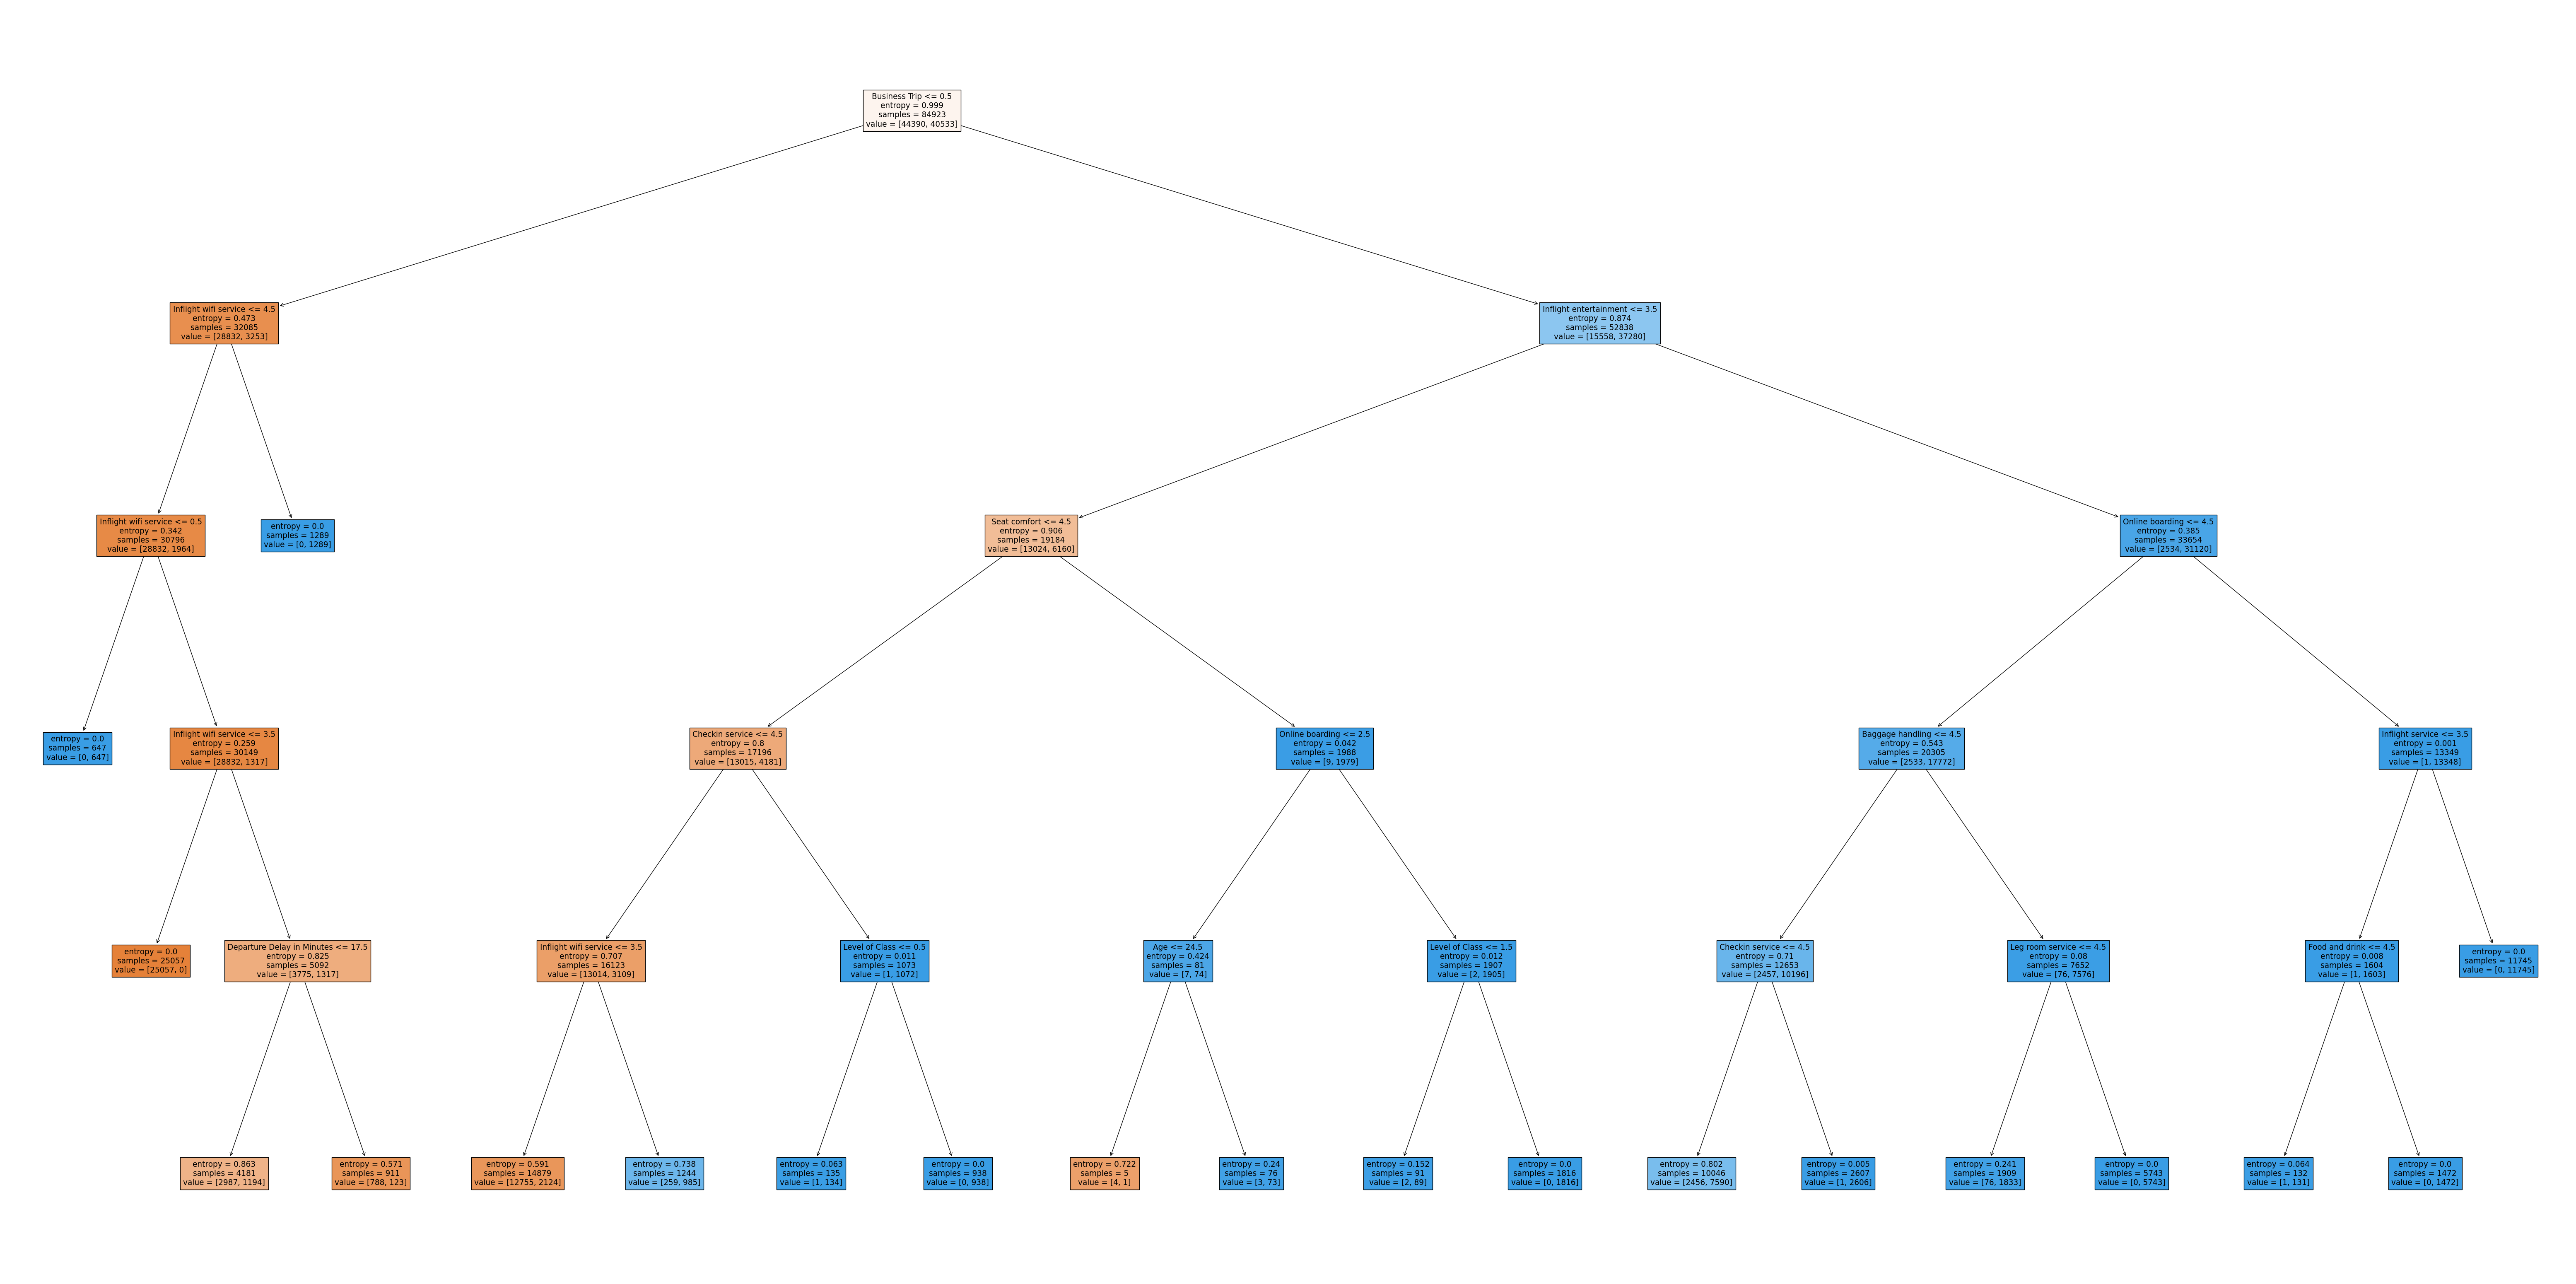

In [62]:
TreeVisual(clf_regulars, 5)

Based on the Tree Visualisation, we can see that:
- half of the regulars are on **business trip**
- Customers that are not in business class with poor wifi experience seems not satisfied.
- Customers in Business Class with **moderate inflight entertainment experience** is a good indicator of disatisfaction.
- If their seat is not comfortable enough they tend to be disatisfied.
- **Check-in service** is also a good factor to filter disatisfied customers.
- And finally, the **wifi service**. Those with poor experience are classified as disatisfied.



### Non_Regular Customer Dataset

Let's see what contributes to customer satisfaction when customers are **not** regulars.

Let's check why some non_regular customers are satisfied with the service.

In [63]:
clf_non_regulars = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
clf_non_regulars.fit(X_non_regulars, y_non_regulars)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

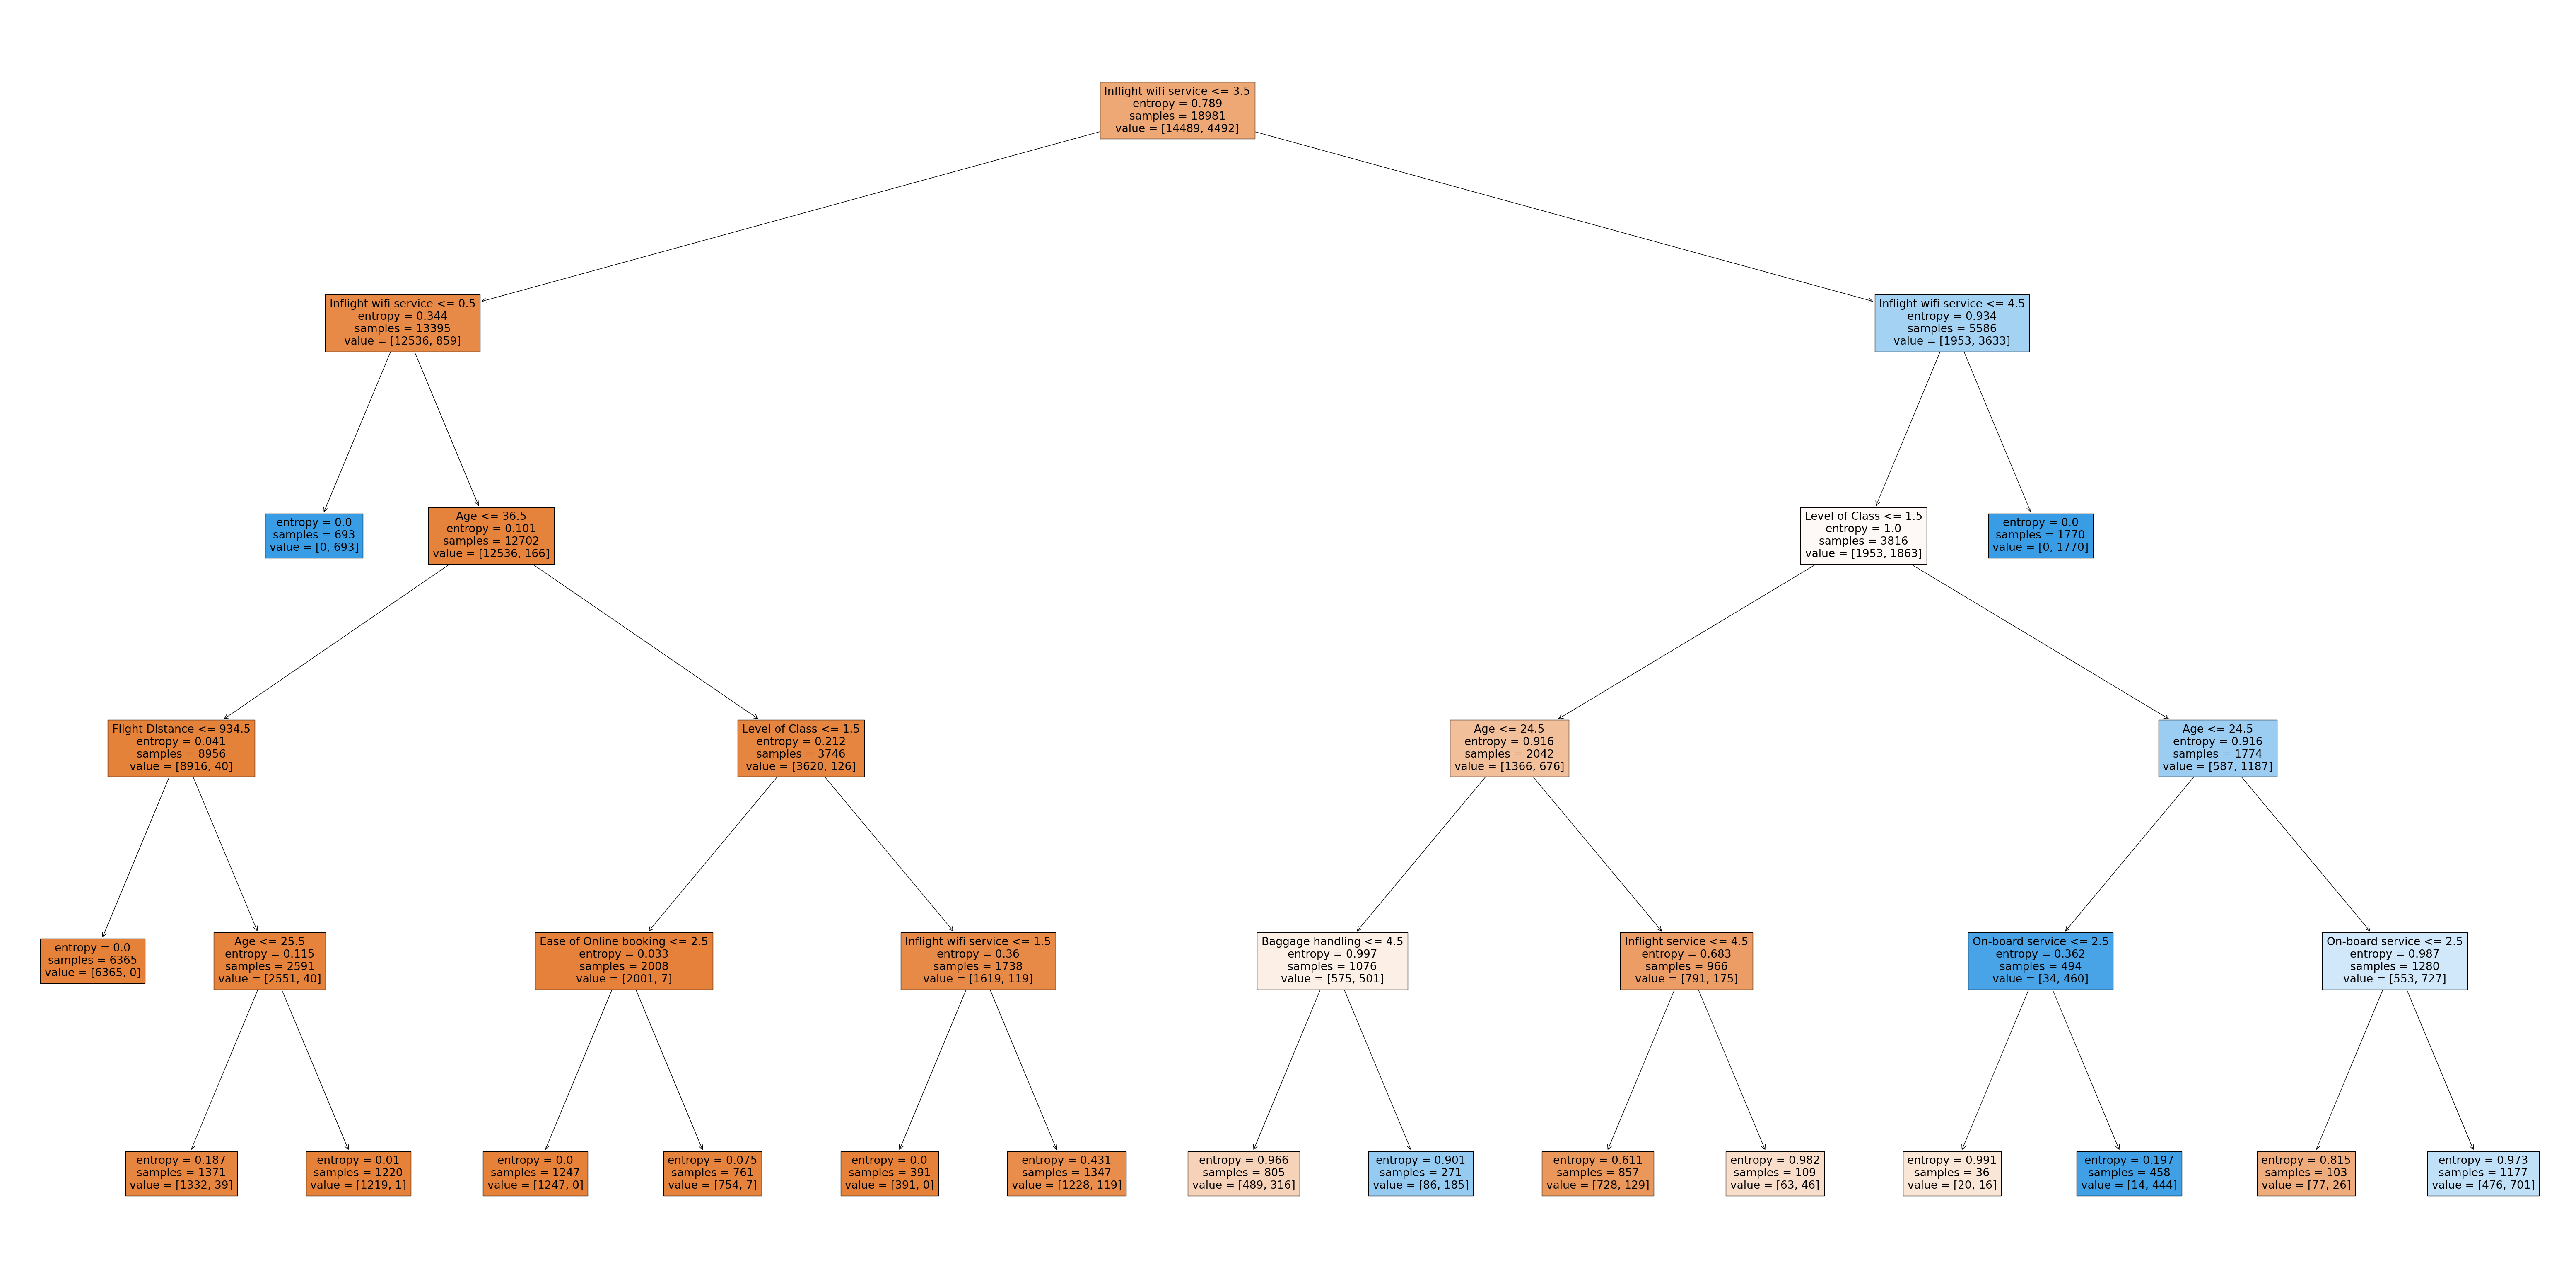

In [64]:
TreeVisual(clf_non_regulars, 5)

Based on the Tree Visualisation, we can see that:
- Most of the satisfied customers had a good **Wifi Service**.
- Interestingly, of those in business class, especially young ones are satisfied already. (maybe because they are in business class?)
- There seems to be some room of improvement in **Inflight service** as well as **Baggage Handling**.



### Regular_Business_Class Customer Dataset

Let's see what contributes to customer satisfaction when customers are regulars.

In [65]:
clf_regulars_bus = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
clf_regulars_bus.fit(X_regulars_bus, y_regulars_bus)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

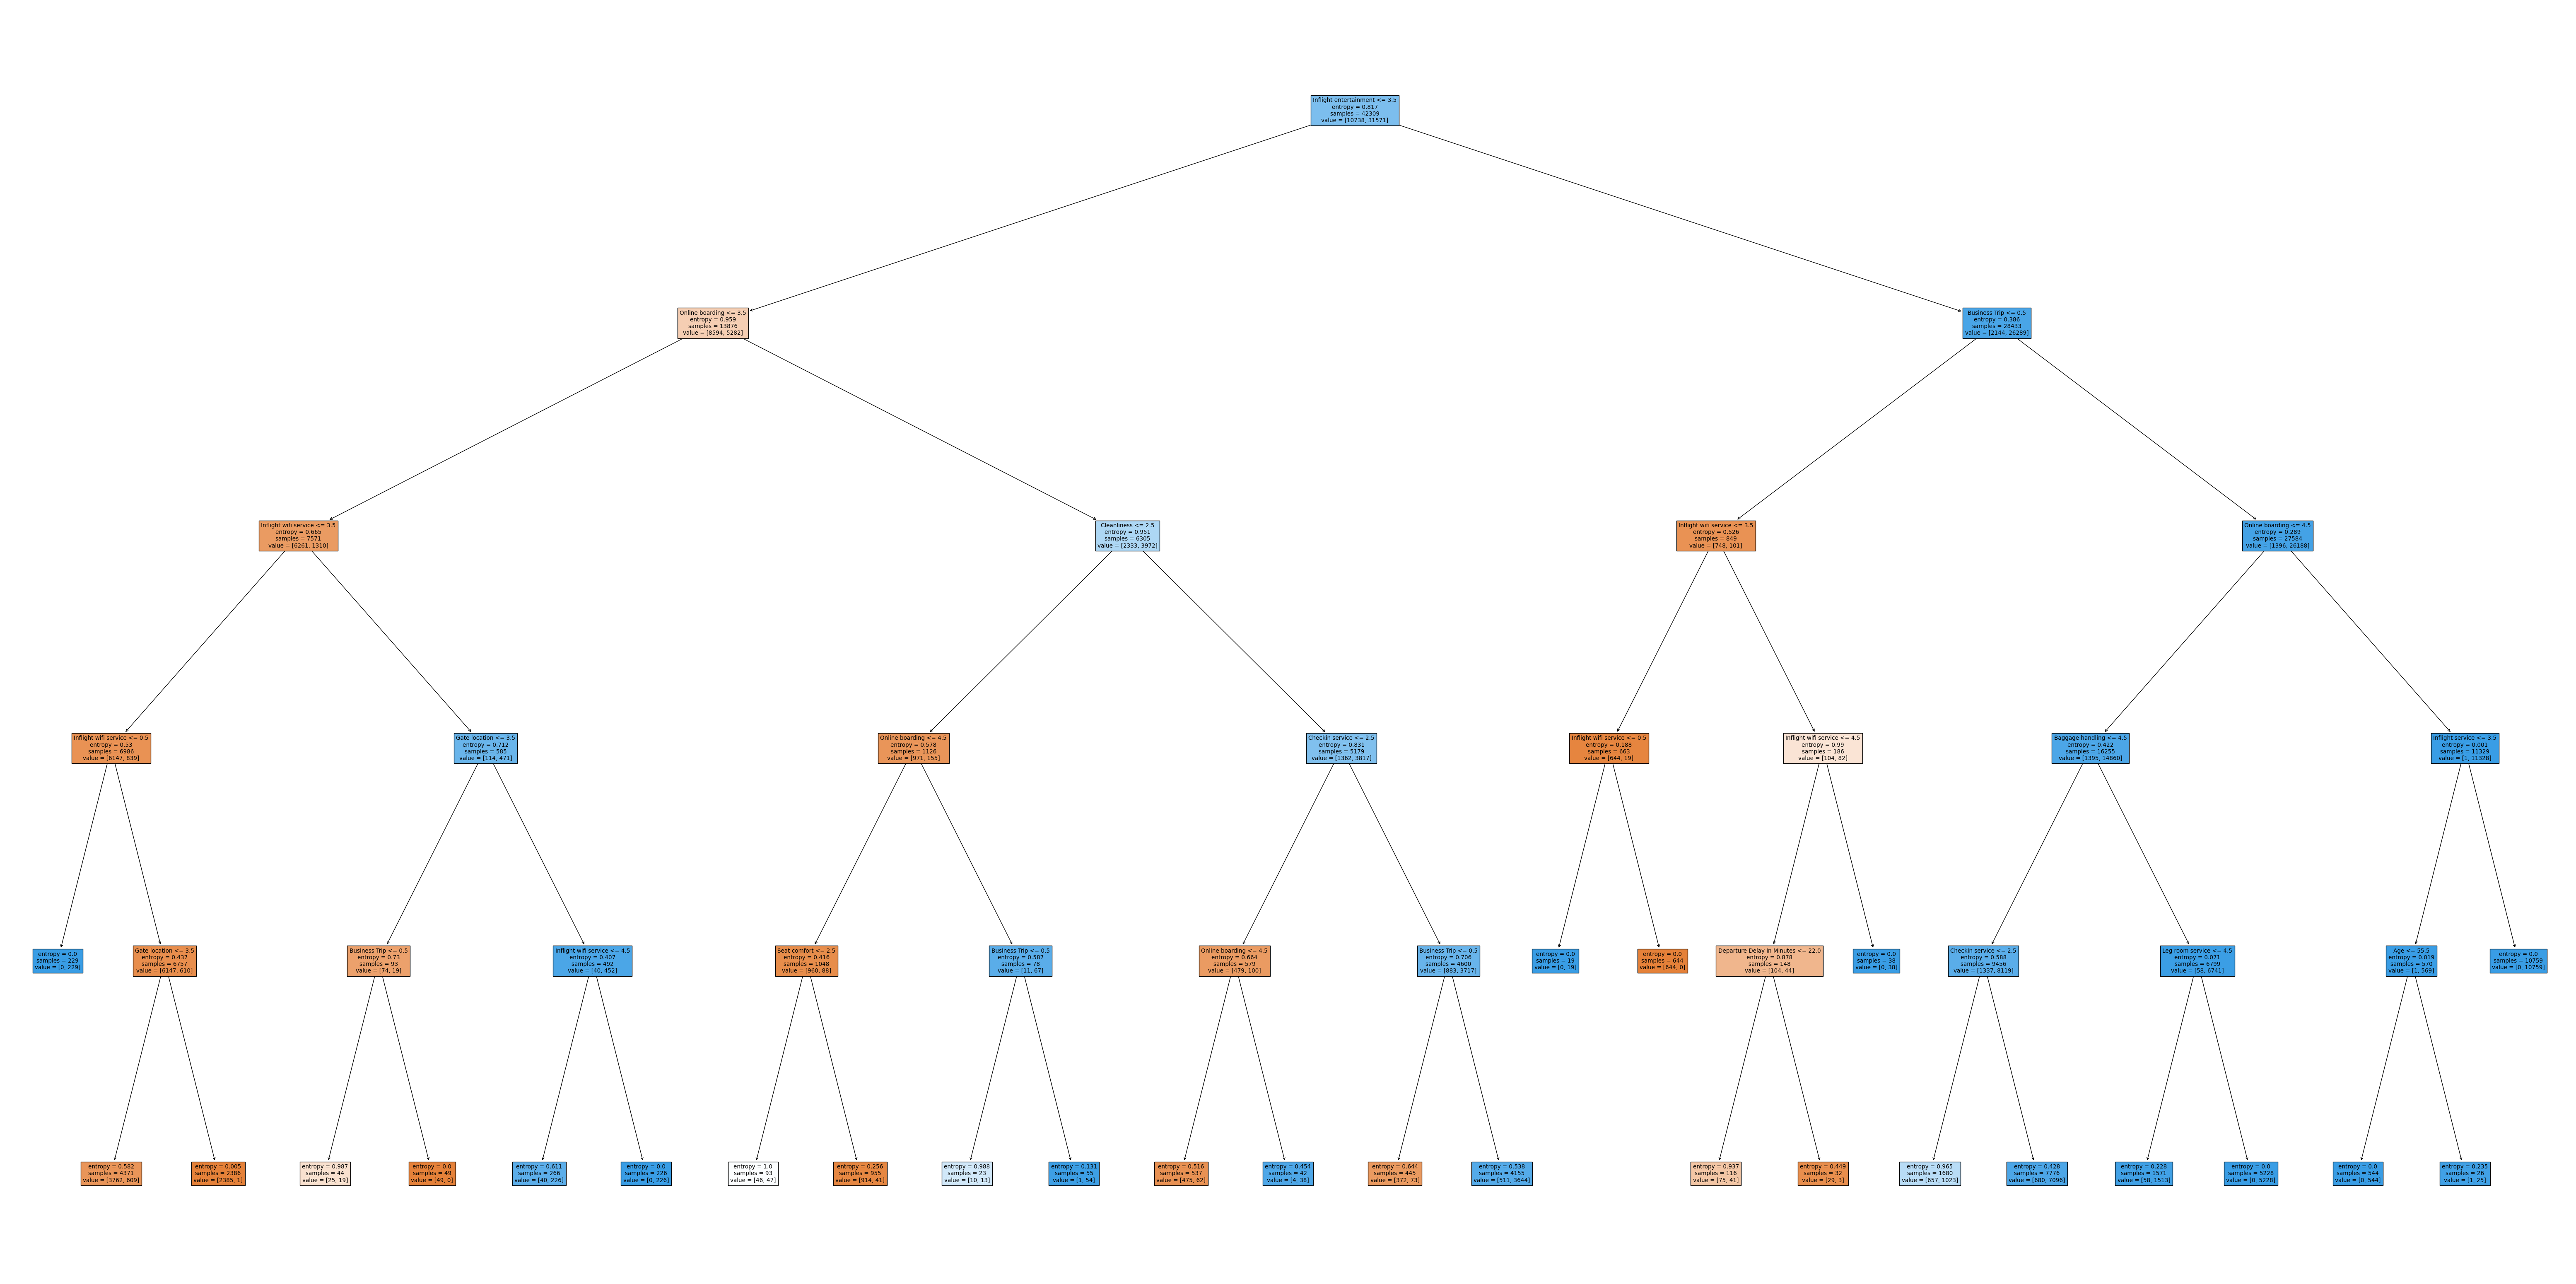

In [66]:
TreeVisual(clf_regulars_bus, 5)

Based on the Tree Visualisation, we can see that:
- Inflight service as well as Clenliness seem matter on top of items listed at the regular customer section.



### Regular Customer Dataset

Let's see what contributes to customer satisfaction when customers are regulars.

In [67]:
clf_regulars_eco = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
clf_regulars_eco.fit(X_regulars_eco, y_regulars_eco)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

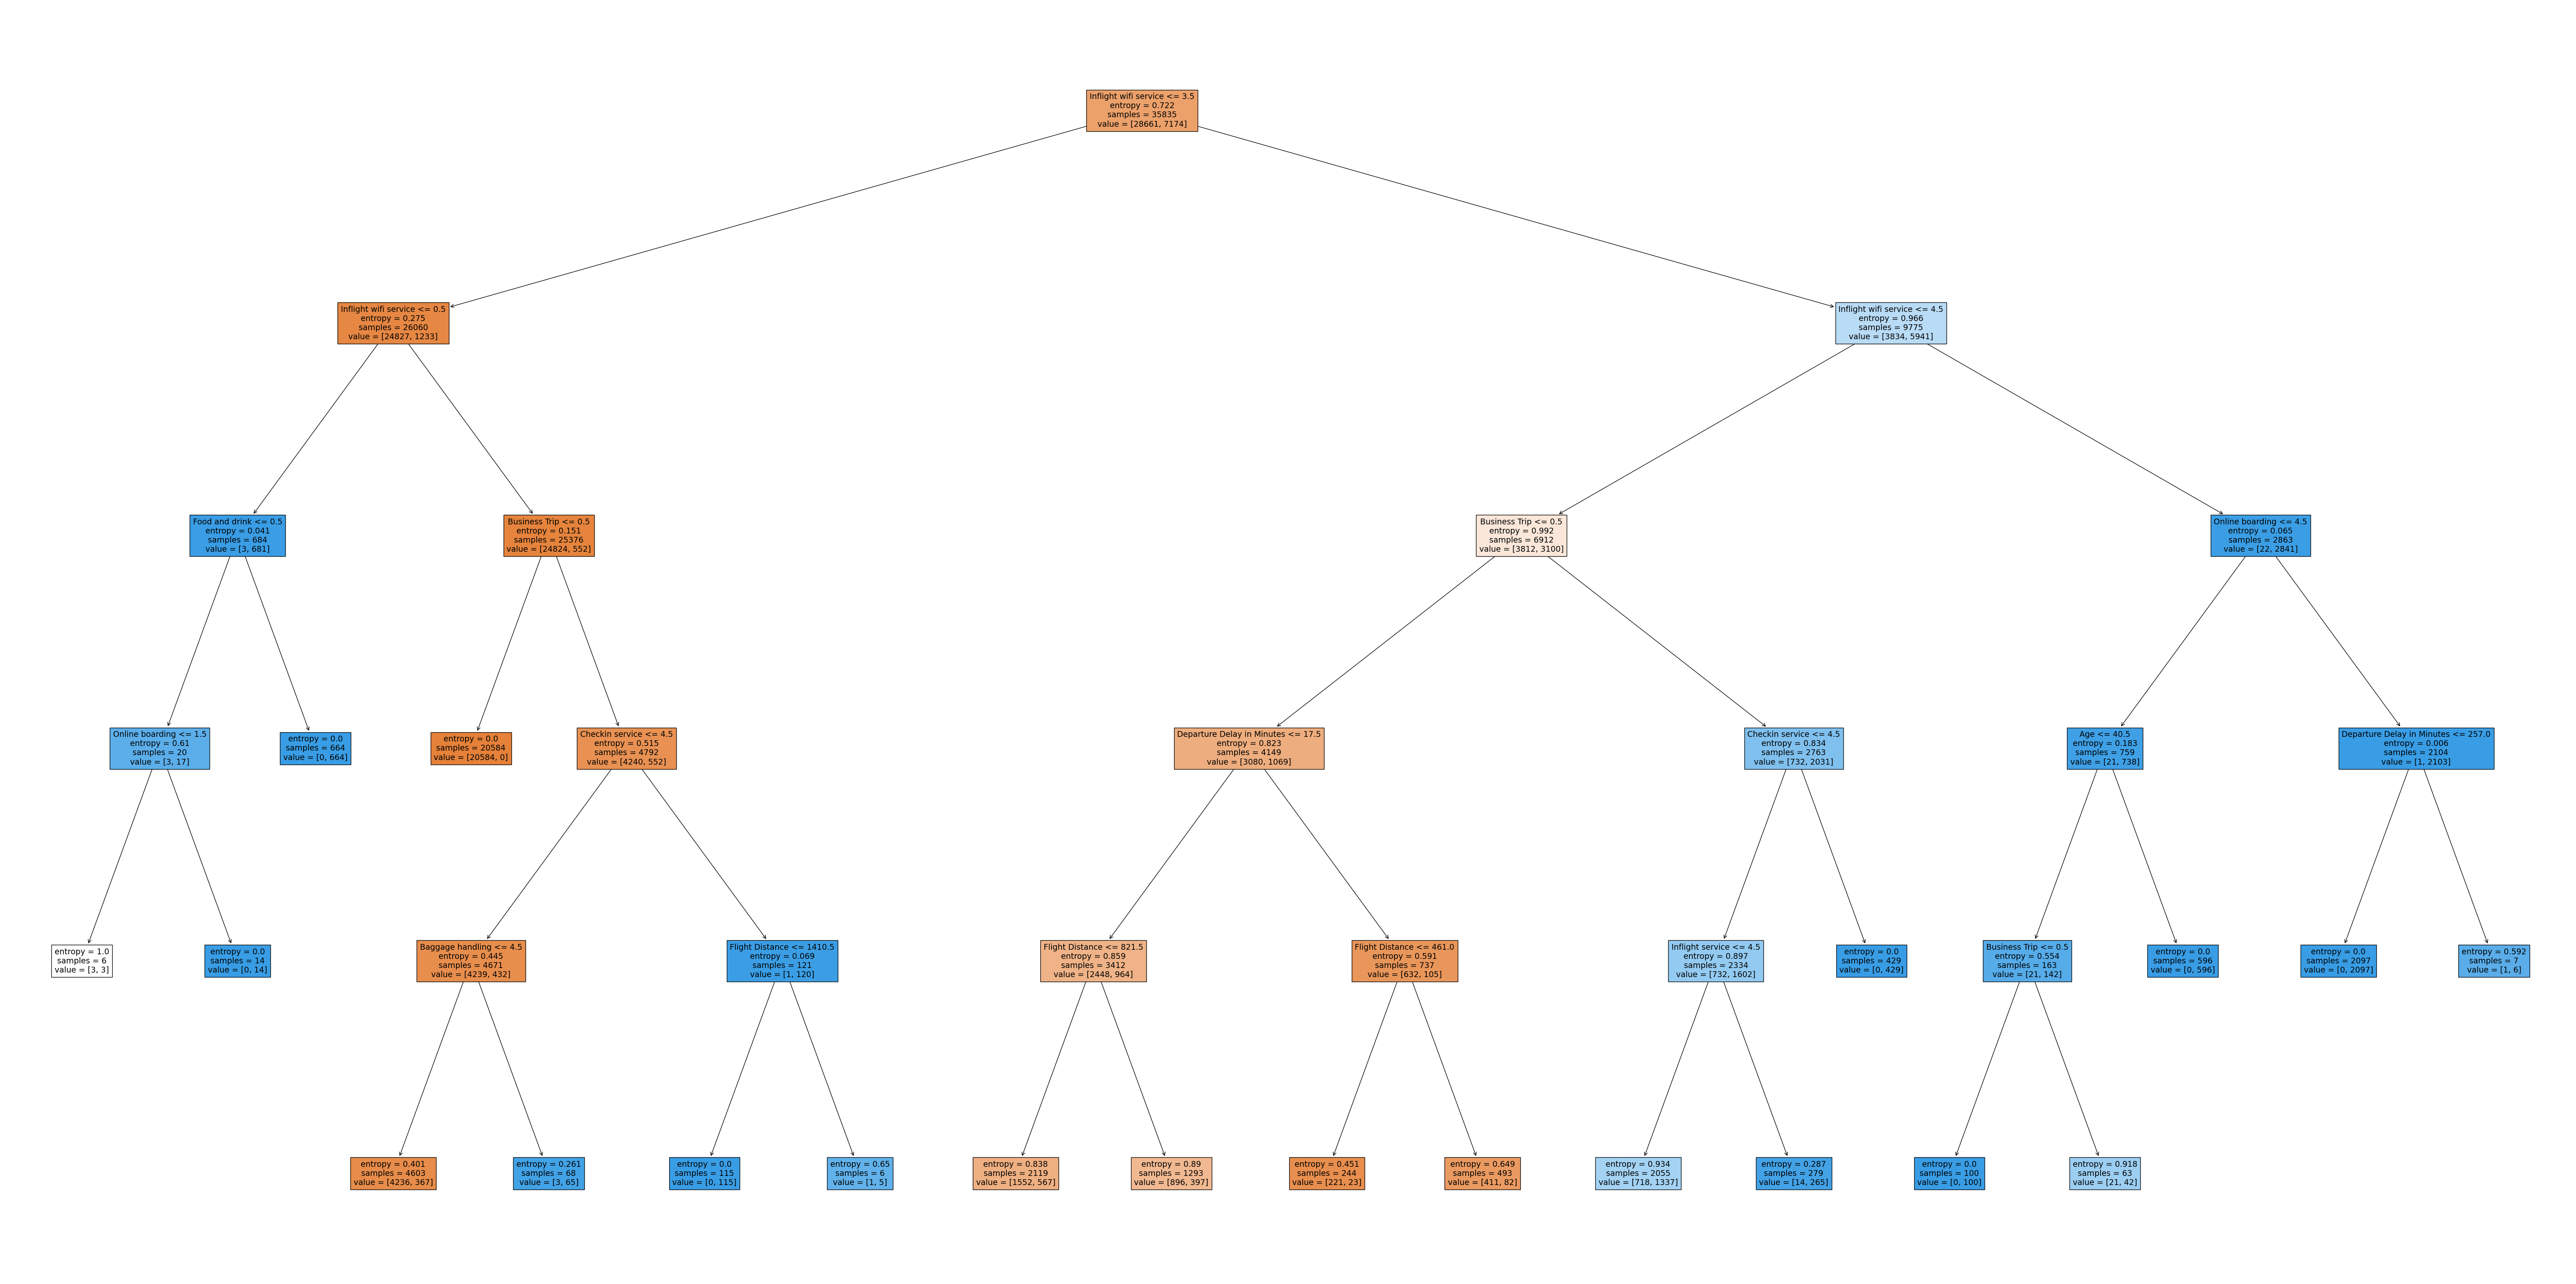

In [68]:
TreeVisual(clf_regulars_eco, 5)

Based on the Tree Visualisation, we can see that:
- Eco on Business Trip seem generally more satisfied than private travel customers.
- Most of them do not have wifi service!

### Summary

Although the result is not 100% trustworthy, we can observe some interesting things from this experiment. To my knowledge, we still need to deep dive into data and explore the differences between groups to determine the most impactful factors as well as improvement areas in the business in data-analytical manner. 

Company could improve below:
- **Searvices that lead to the check-in**

    - Online Boarding with ease is a good starting point in their customer journey.
    
- **Services to the flight**
    - Check-In at the gate without hassle could improve their satisfaction.
    - Customers want their baggage to be looked after for what they paid.
- **Services available in the flight**
    - Wifi Connectivity for those who purchased the service
    - In-flight entertainment experience may need further improvement to distract customers
    - General Hygene (Toilet Cleanliness or Seat/Floor Cleanliness) has room of improvement at the eco, eco plus classes.